## 必要ライブラリのインポート

In [2]:
#音声処理に必要なライブラリ
import pydub
import wave
import librosa
import librosa.display
import pyaudio

#必要最低限のライブラリ
import pandas as pd
import numpy as np
from glob import glob
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

### mp3ファイルをwavファイルに変換

In [6]:
def Mp3toWav(path,save_path):
    sound = pydub.AudioSegment.from_mp3(path)
    sound.export(save_path, format="wav")

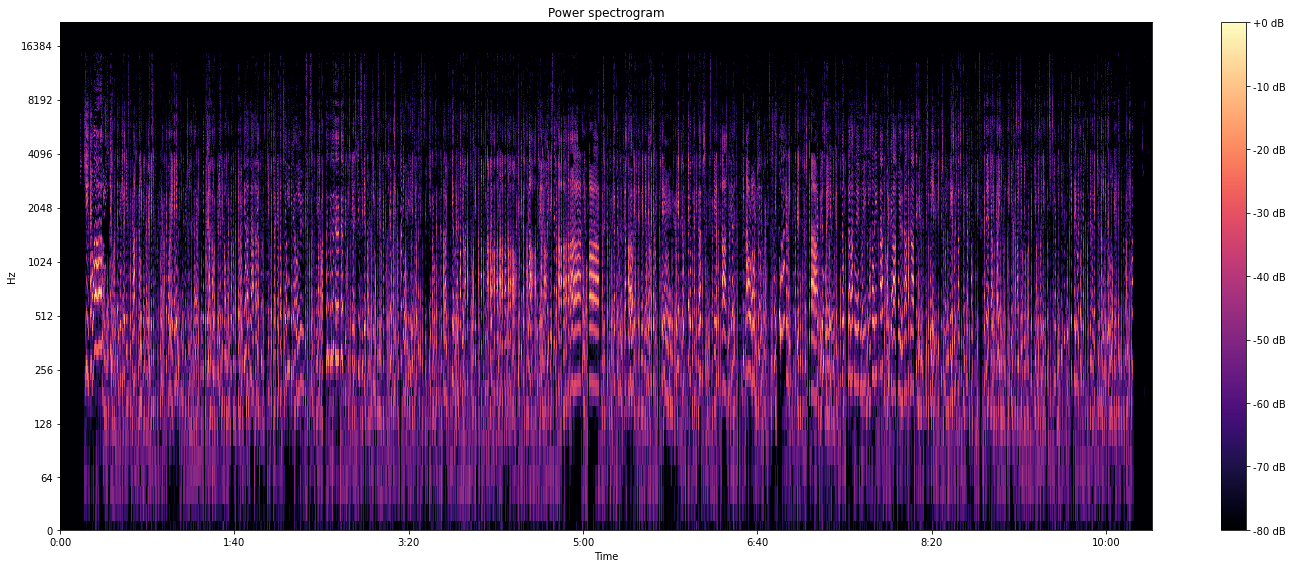

In [5]:
sr=44100
music,sr_=librosa.load("data/vibrato.wav",sr=sr)
D=np.abs(librosa.stft(music))       #短時間フーリエ変換,n_fft(窓関数のサイズ),win_length=n_fft,hop_length=n_fft/4(スライドさせる幅)
plt.figure(figsize=(20,8))
librosa.display.specshow(librosa.amplitude_to_db(D,ref=np.max),y_axis='log',x_axis='time',sr=sr)  #振幅を音圧に変換している
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

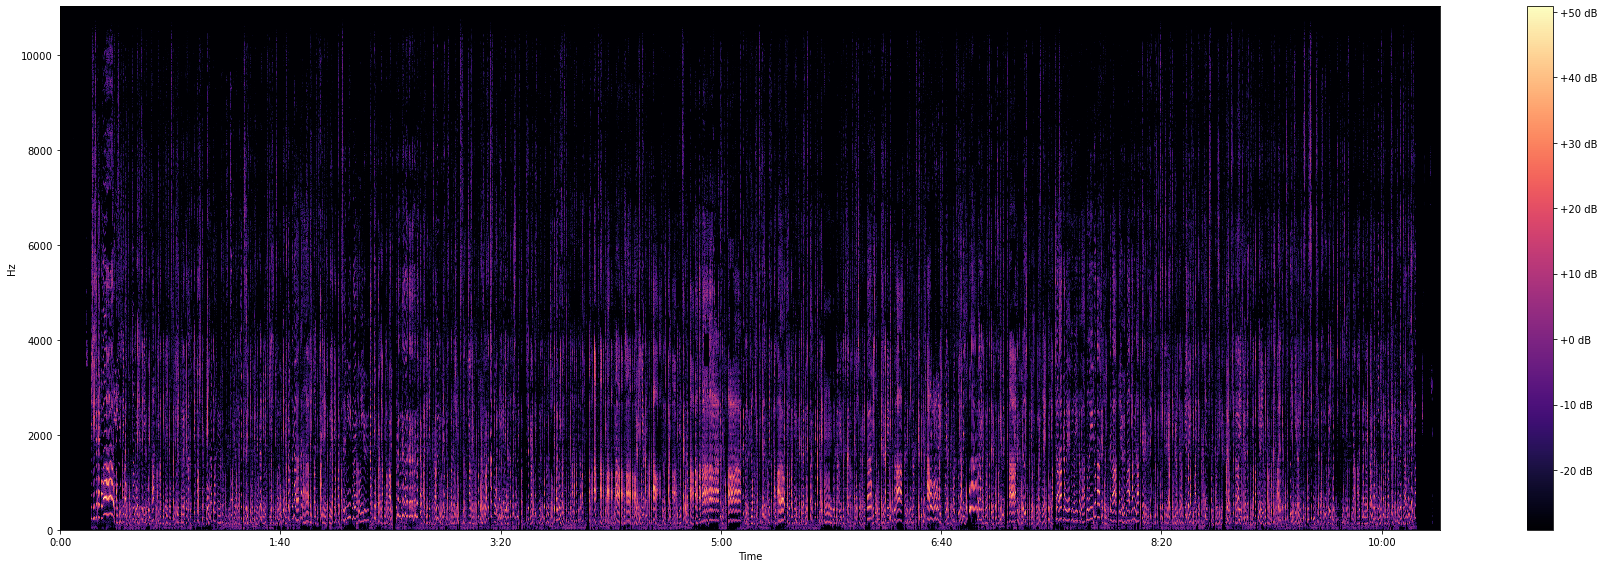

In [7]:
sr=22050
music,sr=librosa.load('data/vibrato.wav',sr=sr)
fft_size=2048
hop_length=int(fft_size/4)
amplitude=np.abs(librosa.core.stft(music,n_fft=fft_size,hop_length=hop_length))

log_power=librosa.core.amplitude_to_db(amplitude)
plt.figure(figsize=(25,8))
librosa.display.specshow(log_power,sr=sr,hop_length=hop_length,x_axis='time',y_axis='hz',cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

In [9]:
log_power.shape

(1025, 26988)

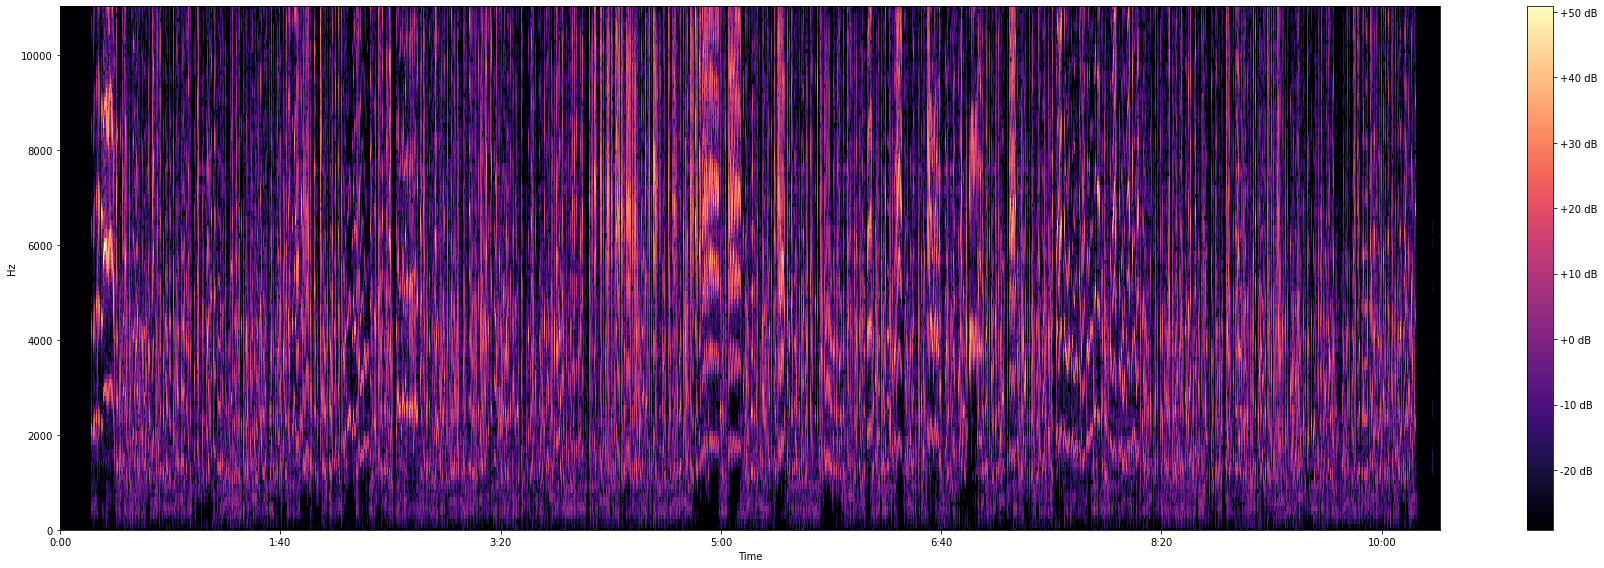

In [12]:
sr=22050
music,sr=librosa.load('data/vibrato.wav',sr=sr)
fft_size=2048
hop_length=int(fft_size/4)
amplitude=np.abs(librosa.core.stft(music,n_fft=fft_size,hop_length=hop_length))

log_power=librosa.core.amplitude_to_db(amplitude)
plt.figure(figsize=(25,8))
librosa.display.specshow(log_power[:120,:],sr=sr,hop_length=hop_length,x_axis='time',y_axis='hz',cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()